In [1]:
import os
import sys
sys.path.insert(0, os.path.join(os.getcwd(), 'src', 'hvplot'))

In [2]:
import hvplot

In [3]:
import requests

resp = requests.get('https://www.meetup.com/mp_api/pro/network?'
                    'queries=(endpoint:pro/pydata/es_groups_summary,'
                    'meta:(method:get),params:(location:%27%27,size:200),'
                    'ref:networkGroups,type:networkGroups)')
resp.raise_for_status()
data = resp.json()

In [4]:
import pandas

df = pandas.DataFrame(data['responses'][0]['value']['chapters'])
df.head().T

0  \
average_age                                                  32.99   
category         [{'id': 34, 'name': 'Tech', 'shortname': 'tech...   
city                                                        London   
country                                             United Kingdom   
description      <p>PyData is an educational program of NumFOCU...   
founded_date                                         1398267437000   
gender_female                                             0.204909   
gender_male                                               0.721461   
gender_other                                             0.0048516   
gender_unknown                                           0.0687785   
group_photo      {'id': 374330532, 'highres_link': 'https://sec...   
id                                                        14064142   
last_event                                             1.55967e+12   
lat                                                          51.52   
lon                                                          -0.09   
member_count                                                  9859   
name                                          PyData London Meetup   
next_event                                                     NaN   
organizer_photo  {'id': 254591449, 'highres_link': 'https://sec...   
organizers       [{'name': 'PyData/NumFOCUS', 'member_id': 1353...   
past_events                                                     62   
past_rsvps                                                   13629   
pro_join_date                                        1448378103366   
repeat_rsvpers                                                2208   
rsvps_per_event                                            219.823   
state                                                          NaN   
status                                                      Active   
topics           [{'id': 456, 'name': 'Artificial Intelligence'...   
upcoming_events                                                  0   
urlname                                       PyData-London-Meetup   

                                                                 1  \
average_age                                                33.9912   
category         [{'id': 34, 'name': 'Tech', 'shortname': 'tech...   
city                                                     Cambridge   
country                                             United Kingdom   
description      <p>PyData Cambridge is our local PyData meetup...   
founded_date                                         1538680376000   
gender_female                                             0.186544   
gender_male                                                0.69419   
gender_other                                             0.0275229   
gender_unknown                                           0.0917431   
group_photo      {'id': 475167062, 'highres_link': 'https://sec...   
id                                                        30061392   
last_event                                             1.56157e+12   
lat                                                          52.21   
lon                                                           0.13   
member_count                                                   538   
name                                              PyData Cambridge   
next_event                                                     NaN   
organizer_photo  {'id': 280972552, 'highres_link': 'https://sec...   
organizers       [{'name': 'Leandro Nunes', 'member_id': 192582...   
past_events                                                      9   
past_rsvps                                                     579   
pro_join_date                                        1538743002959   
repeat_rsvpers                                                 120   
rsvps_per_event                                            64.3333   
state                                                          NaN   
stat

In [5]:
df.nlargest(20, ['past_events'])[['name', 'member_count', 'past_events', 'gender_female']]

name  member_count  past_events  \
0                      PyData London Meetup          9859           62   
19                            PyData Berlin          5001           62   
78                           PyData Atlanta          3095           49   
137                        PyData Singapore          5421           47   
70                           PyData Chicago          3780           46   
75                KnoxData - a PyData group           737           42   
76                             PyData Delhi          6383           33   
7                          PyData Amsterdam          3181           32   
34                            PyData Warsaw          3675           29   
67                         PyData Ann Arbor          1313           29   
122                   PyData Belo Horizonte          1518           29   
50                          PyData Tel Aviv          5906           28   
86   PyData Miami / Machine Learning Meetup          1092           25   
87                            PyData Mumbai          1114           24   
94                           PyData Seattle          1998           24   
69                        PyData Fort Wayne           182           23   
18                            PyData Munich          2045           22   
84                           PyData Calgary           979           21   
30                          PyData Mallorca           823           20   
63                               PyData NYC          3988           20   

     gender_female  
0         0.204909  
19        0.216648  
78        0.223278  
137       0.197946  
70        0.211370  
75        0.241197  
76        0.111606  
7         0.204787  
34        0.213796  
67        0.199280  
122       0.197615  
50        0.229542  
86        0.166456  
87        0.114987  
94        0.270718  
69        0.181159  
18        0.188112  
84        0.186082  
30        0.222031  
63        0.281517

In [6]:
df[df.name == 'PyData NYC'].organizers.iloc[0]

[{'name': 'PyData/NumFOCUS',
  'member_id': 135325322,
  'permission': 'organizer'},
 {'name': 'Andy Fundinger', 'member_id': 2797257, 'permission': 'coorganizer'},
 {'name': 'Paul Ganssle', 'member_id': 11550504, 'permission': 'coorganizer'},
 {'name': 'Sylvain Corlay',
  'member_id': 61762442,
  'permission': 'event_organizer'},
 {'name': 'James Powell', 'member_id': 64072142, 'permission': 'coorganizer'},
 {'name': 'Lauren Oldja', 'member_id': 118567592, 'permission': 'coorganizer'},
 {'name': 'Casey Clements',
  'member_id': 174527012,
  'permission': 'coorganizer'}]

In [7]:
df = df.set_index('name')

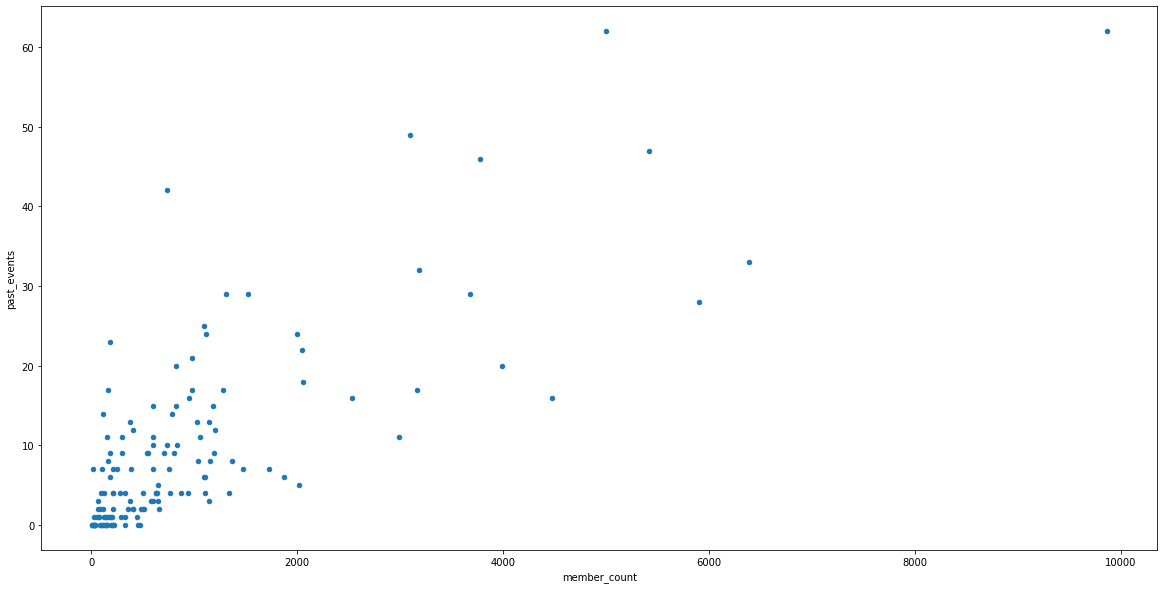

In [8]:
%matplotlib inline
df.plot(kind='scatter', x='member_count', y='past_events', figsize=(20, 10))

In [9]:
pandas.set_option('plotting.backend', 'hvplot')

In [10]:
df.plot(kind='scatter', x='member_count', y='past_events', figsize=(20, 10))

:Scatter   [member_count]   (past_events)

In [11]:
import hvplot

In [12]:
dir(hvplot)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [13]:
hvplot.__path__

_NamespacePath(['/home/mgarcia/talks/pandas_plotting/hvplot', '/home/mgarcia/talks/pandas_plotting/hvplot'])